In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data_set_loc = "data/SNAP.csv"
# column_name = "Close"
# dataset = pd.read_csv(data_set_loc)

In [73]:
data_set_loc = "data/abalone/abalone.data"

column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
column_name = "Height"
dataset = pd.read_csv(data_set_loc, names=column_names)

In [74]:
dataset.head(10)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [75]:
len(dataset[column_name])

4177

In [76]:
import matplotlib.pyplot as plt

def plot_histogram(dataframe, column_name):
    """
    Plot a histogram for a specific column in a pandas DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: Name of the column to plot as a histogram
    """
    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    plt.hist(dataframe[column_name], bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


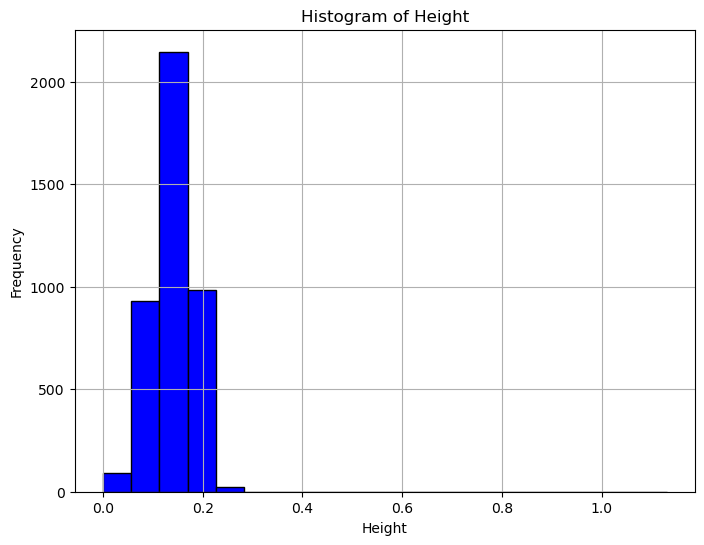

In [77]:
plot_histogram(dataset, column_name)

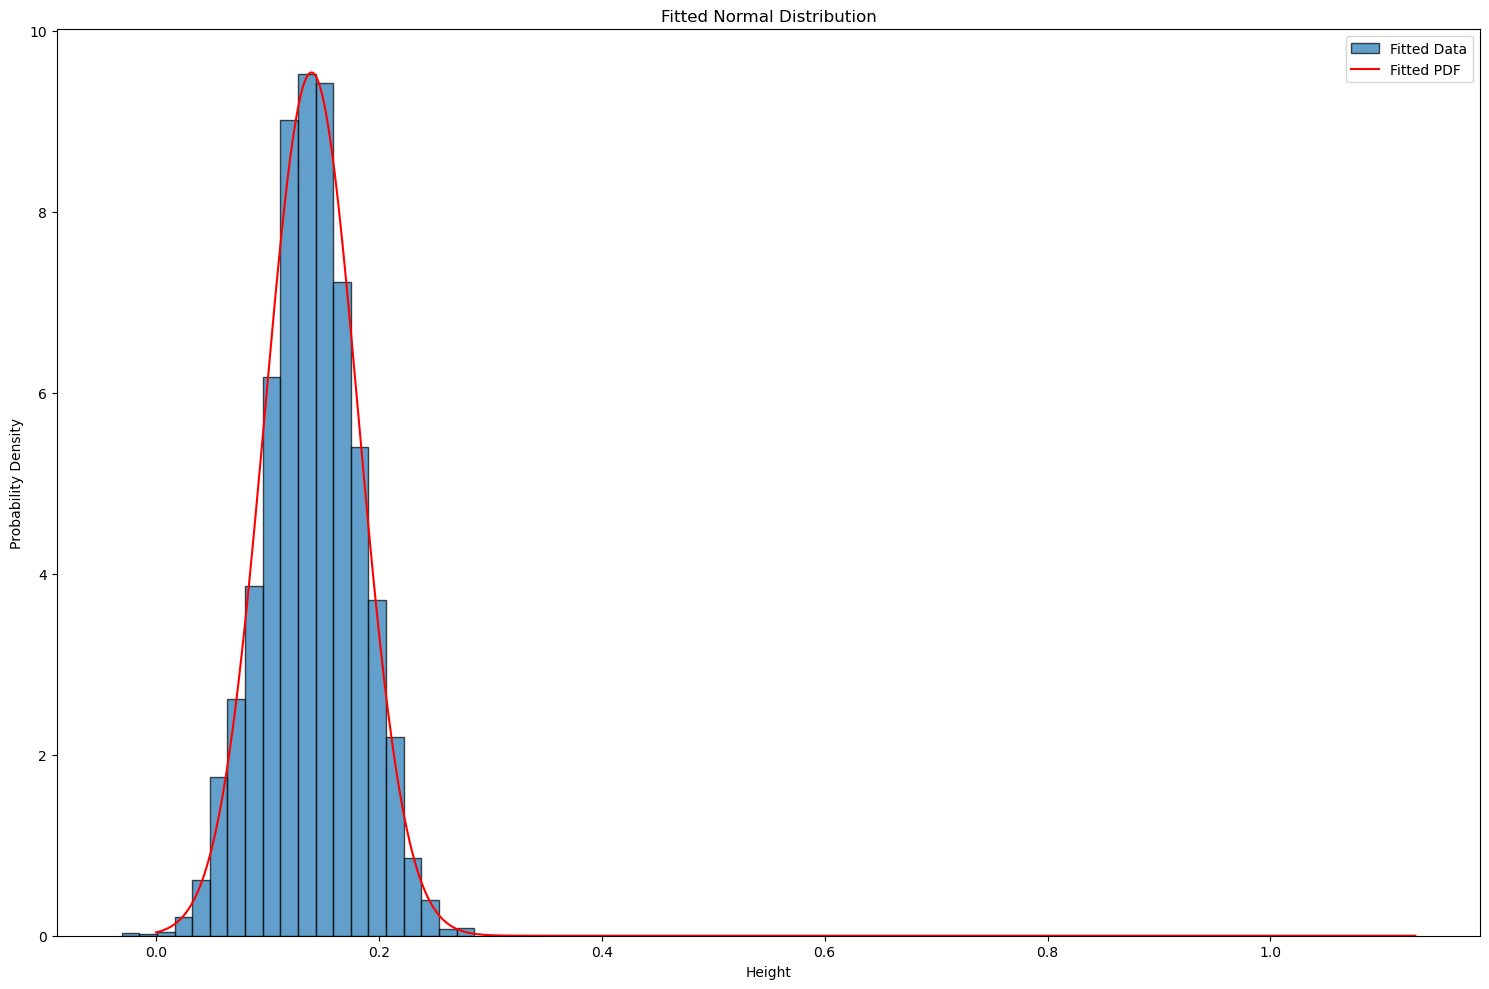

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def fit_and_plot_distributions(data, column_name):
    x_range = np.linspace(0, data[column_name].max(), 1000)
    mu, sigma = norm.fit(data[column_name])  # Fit a normal distribution to the data
    fitted_data = norm.rvs(loc=mu, scale=sigma, size=len(data))
    pdf = norm.pdf(x_range, loc=mu, scale=sigma)
    title = "Fitted Normal Distribution"
    
    # Create a single subplot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    ax.hist(fitted_data, bins=20, density=True, alpha=0.7, edgecolor="black", label="Fitted Data")
    ax.plot(x_range, pdf, 'r', label="Fitted PDF")
    ax.set_xlabel(column_name)
    ax.set_ylabel("Probability Density")
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your dataset and column name
fit_and_plot_distributions(dataset, column_name)


In [83]:
import pandas as pd
import numpy as np
from scipy.stats import expon, norm, uniform, poisson, gamma

def mom_estimator(data, distributions):
    estimators = {}

    for dist_name, dist_label in distributions:
        if dist_name == "exponential":
            sample_mean = data.mean()
            lambda_mom = 1 / sample_mean
            estimators[dist_label] = f"MOM Estimator for {dist_label}: λ = {lambda_mom:.6f}"
        elif dist_name == "normal":
            sample_mean = data.mean()
            sample_std = data.std()
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Mean = {sample_mean:.6f}, Standard Deviation = {sample_std:.6f}"
        elif dist_name == "uniform":
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Minimum = {data.min()}, Maximum = {data.max()}"
        elif dist_name == "poisson":
            sample_mean = data.mean()
            estimators[dist_label] = f"MOM Estimator for {dist_label}: λ = {sample_mean:.6f}"
        elif dist_name == "gamma":
            sample_mean = data.mean()
            sample_var = data.var()
            alpha_mom = sample_mean**2 / sample_var
            beta_mom = sample_var / sample_mean
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Shape (α) = {alpha_mom:.6f}, Scale (β) = {beta_mom:.6f}"
        else:
            estimators[dist_label] = f"Distribution '{dist_name}' not recognized. MOM Estimators are not applicable."

    return estimators


In [80]:
distributions = [
    # ("exponential", "Exponential"),
    ("normal", "Normal"),
    # ("uniform", "Uniform"),
    # ("poisson", "Poisson"),
    # ("gamma", "Gamma")
]


data = dataset[column_name]  # Replace "area" with the column you want to analyze
mom_estimators = mom_estimator(data, distributions)
for dist_label, mom in mom_estimators.items():
    print(mom)

MOM Estimators for Normal: Mean = 0.139516, Standard Deviation = 0.041827


In [81]:
from scipy.stats import expon, norm, uniform, poisson, lognorm, gamma
import numpy as np

def analyze_distributions(data, column_name, specific_event, distributions):
    results = {}
    
    for distribution, params in distributions:
        if distribution == "exponential":
            lambda_mom = params
            prob_gt_event = 1 - expon.cdf(specific_event, loc=0, scale=1 / lambda_mom)
            num_samples = 1000
            loc, scale = 0, 1 / lambda_mom
            random_samples = expon.rvs(loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "normal":
            mu, sigma = params
            prob_gt_event = 1 - norm.cdf(specific_event, loc=mu, scale=sigma)
            num_samples = 1000
            random_samples = norm.rvs(loc=mu, scale=sigma, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "uniform":
            loc, scale = params
            prob_gt_event = 1 - uniform.cdf(specific_event, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = uniform.rvs(loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "poisson":
            mu = params
            prob_gt_event = 1 - poisson.cdf(specific_event, mu)
            num_samples = 1000
            random_samples = poisson.rvs(mu, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "lognormal":
            s, loc, scale = params
            prob_gt_event = 1 - lognorm.cdf(specific_event, s=s, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = lognorm.rvs(s=s, loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "gamma":
            a, loc, scale = params
            prob_gt_event = 1 - gamma.cdf(specific_event, a=a, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = gamma.rvs(a=a, loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
    
    return results

In [82]:
# Example usage:
data = dataset[column_name]
specific_event = 10

distributions = [
    # ("exponential", 1 / data.mean()),  # Exponential distribution with lambda_MOM
    ("normal", (data.mean(), data.std())),  # Normal distribution with mean and standard deviation
    # ("uniform", (data.min(), data.max())),  # Uniform distribution with min and max
    # ("poisson", data.mean()),  # Poisson distribution with lambda
    # ("lognormal", (1, 0, np.exp(data.mean()))),  # Log-Normal distribution with shape, loc, and scale
    # ("gamma", (2, 0, data.mean()))  # Gamma distribution with shape, loc, and scale
]

results = analyze_distributions(data, column_name, specific_event, distributions)

for distribution, (prob_gt_5, random_samples) in results.items():
    print(f"Distribution: {distribution}")
    print(f"Probability of X > {specific_event}: {prob_gt_5:.6f}")
    print(f"First 10 random samples: {random_samples[:10]}\n")

Distribution: normal
Probability of X > 10: 0.000000
First 10 random samples: [0.17628016 0.13254707 0.1920554  0.16887948 0.07939791 0.1387386
 0.14216406 0.18844245 0.12290047 0.09788401]

